In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
advert=pd.read_csv('Advertising_Sales.csv')
print(advert)

     Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]


In [3]:
advert.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [4]:
advert.corr()

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


In [5]:
advert.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

# Linear Regression

In [6]:
x=advert[['TV']]
x.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [7]:
y=advert.Sales
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [8]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=1)

In [9]:
linreg=LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression()

In [10]:
y_pred=linreg.predict(x_test)

In [11]:
from sklearn import metrics as m

In [12]:
m.mean_absolute_error(y_test,y_pred)

2.465982781571736

In [13]:
m.mean_squared_error(y_test,y_pred)

10.859345325608269

In [14]:
np.sqrt(m.mean_squared_error(y_test,y_pred))

3.2953520791575928

In [15]:
m.r2_score(y_test,y_pred)

0.41535307148347866

In [16]:
y_train_pred=linreg.predict(x_train)

In [17]:
m.r2_score(y_train,y_train_pred)

0.6393874827744095

# Multiple Linear Regression

In [18]:
advert

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [19]:
advert.drop(['Unnamed: 0'],axis=1,inplace=True)

In [20]:
advert.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [21]:
advert.shape

(200, 4)

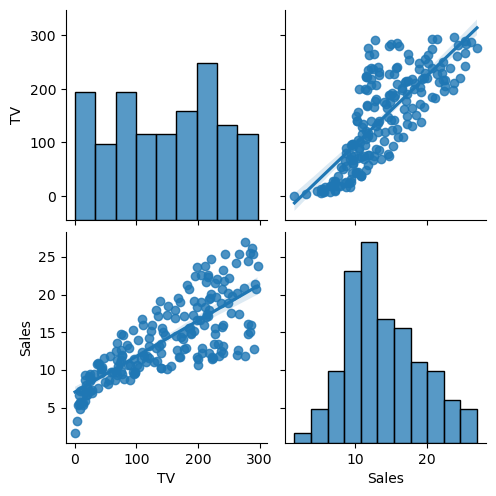

In [22]:
sns.pairplot(advert,vars=['TV','Sales'],kind='reg')

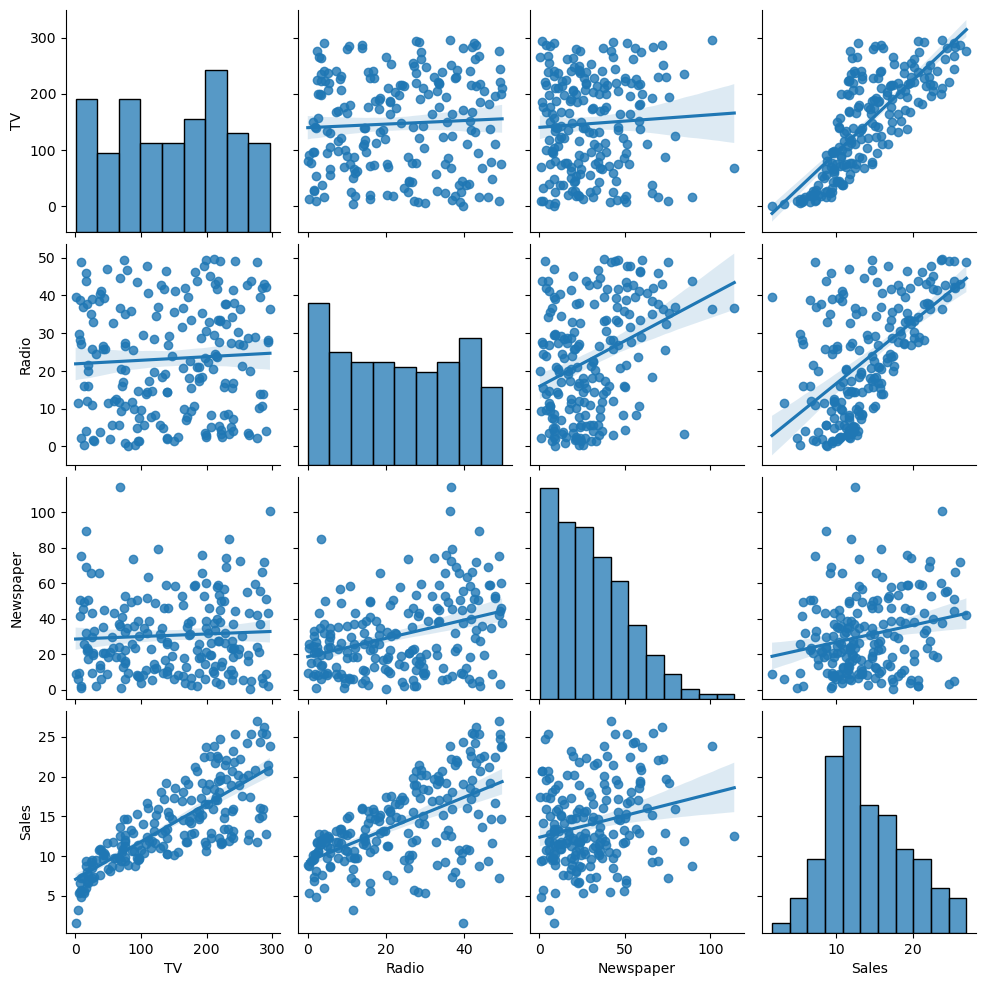

In [23]:
sns.pairplot(advert,kind='reg')

<Axes: >

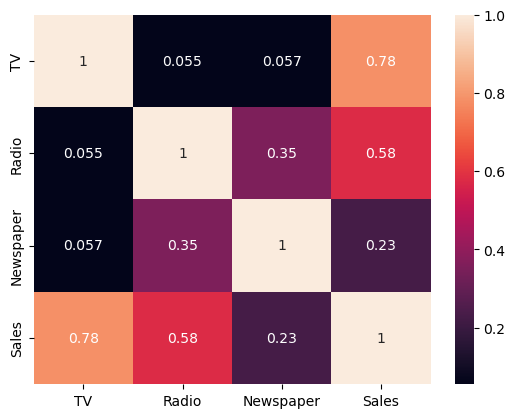

In [24]:
sns.heatmap(advert.corr(),annot=True)

In [25]:
x=advert[['TV','Radio','Newspaper']]

In [26]:
print(x)

        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]


In [27]:
y=advert.Sales

In [28]:
print(y)

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [31]:
print(x_train)

        TV  Radio  Newspaper
108   13.1    0.4       25.6
107   90.4    0.3       23.2
189   18.7   12.1       23.4
14   204.1   32.9       46.0
56     7.3   28.1       41.4
..     ...    ...        ...
133  219.8   33.5       45.1
137  273.7   28.9       59.7
72    26.8   33.0       19.3
140   73.4   17.0       12.9
37    74.7   49.4       45.7

[160 rows x 3 columns]


In [32]:
print(x_test)

        TV  Radio  Newspaper
58   210.8   49.6       37.7
40   202.5   22.3       31.6
34    95.7    1.4        7.4
102  280.2   10.1       21.4
184  253.8   21.3       30.0
198  283.6   42.0       66.2
95   163.3   31.6       52.9
4    180.8   10.8       58.4
29    70.6   16.0       40.8
168  215.4   23.6       57.6
171  164.5   20.9       47.4
18    69.2   20.5       18.3
11   214.7   24.0        4.0
89   109.8   47.8       51.4
110  225.8    8.2       56.5
118  125.7   36.9       79.2
159  131.7   18.4       34.6
35   290.7    4.1        8.5
136   25.6   39.0        9.3
59   210.7   29.5        9.3
51   100.4    9.6        3.6
16    67.8   36.6      114.0
44    25.1   25.7       43.3
94   107.4   14.0       10.9
31   112.9   17.4       38.6
162  188.4   18.1       25.6
38    43.1   26.7       35.1
28   248.8   27.1       22.9
193  166.8   42.0        3.6
27   240.1   16.7       22.9
47   239.9   41.5       18.5
165  234.5    3.4       84.8
194  149.7   35.6        6.0
177  170.2    

In [33]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()

In [34]:
x_train = st.fit_transform(x_train)
x_test = st.transform(x_test)

In [35]:
print(x_train)

[[-1.47861420e+00 -1.50740896e+00 -2.07096465e-01]
 [-5.93912087e-01 -1.51399099e+00 -3.21290955e-01]
 [-1.41452194e+00 -7.37311102e-01 -3.11774748e-01]
 [ 7.07389725e-01  6.31751749e-01  7.63556698e-01]
 [-1.54499547e+00  3.15814168e-01  5.44683926e-01]
 [ 5.73110715e-02  3.93687845e-02 -5.16373209e-01]
 [-7.33541657e-01  1.54665433e+00  2.16374768e-01]
 [ 9.80926342e-01  9.47689330e-01  9.74221741e-02]
 [ 7.17690268e-01  1.43475977e+00 -4.92582690e-01]
 [ 9.98093912e-01  5.92259551e-01  2.10534195e+00]
 [ 1.68708573e+00  1.25046284e+00  1.01097809e+00]
 [-2.19659059e-01  7.43646309e-01 -8.35166159e-01]
 [-1.40651040e+00 -4.80611817e-01 -3.64113889e-01]
 [ 4.61321221e-01  1.50716213e+00  1.36783587e+00]
 [ 1.41126010e+00 -2.17330500e-01 -1.41089671e+00]
 [ 2.66755427e-01 -8.75533794e-01 -5.87744765e-01]
 [ 8.72198398e-01 -1.17830731e+00 -1.21450598e-01]
 [-1.34241814e+00 -8.09713464e-01 -1.20142119e-02]
 [ 1.02785103e+00 -9.67682255e-01 -1.01121600e+00]
 [-1.13640730e+00  1.71009443e-

In [36]:
print(x_test)

[[ 7.84071539e-01  1.73095125e+00  3.68634087e-01]
 [ 6.89077651e-01 -6.59437425e-02  7.83897591e-02]
 [-5.33253340e-01 -1.44158863e+00 -1.07307135e+00]
 [ 1.57835778e+00 -8.68951761e-01 -4.06936823e-01]
 [ 1.27620855e+00 -1.31764072e-01  2.26009928e-03]
 [ 1.61727094e+00  1.23071675e+00  1.72469365e+00]
 [ 2.40431819e-01  5.46185321e-01  1.09186586e+00]
 [ 4.40720137e-01 -8.22877530e-01  1.35356156e+00]
 [-8.20524012e-01 -4.80611817e-01  5.16135303e-01]
 [ 8.36718753e-01  1.96226857e-02  1.31549673e+00]
 [ 2.54165875e-01 -1.58092204e-01  8.30170150e-01]
 [-8.36547078e-01 -1.84420335e-01 -5.54438039e-01]
 [ 8.28707221e-01  4.59508174e-02 -1.23484687e+00]
 [-3.71878181e-01  1.61247466e+00  1.02049430e+00]
 [ 9.55747239e-01 -9.94010386e-01  1.26315759e+00]
 [-1.89901938e-01  8.95033066e-01  2.34324714e+00]
 [-1.21231657e-01 -3.22643027e-01  2.21132871e-01]
 [ 1.69853077e+00 -1.26387374e+00 -1.02073221e+00]
 [-1.33555111e+00  1.03325576e+00 -9.82667375e-01]
 [ 7.82927034e-01  4.07962629e-

In [37]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression()

In [38]:
linreg.intercept_

13.811250000000001

In [39]:
linreg.coef_

array([4.09287129, 2.7126018 , 0.05435329])

In [40]:
y_pred=linreg.predict(x_test)
print(y_pred)

[21.73577184 16.45693776  7.65993185 17.89202679 18.67730671 23.86271904
 16.33623628 13.45649226  9.177296   17.36056228 14.4677995   9.85697601
 17.26057027 16.71866935 15.09530285 15.58923732 12.45188167 17.27925151
 11.0944114  18.06889853  9.33433055 12.91345761  8.7842804  10.46670654
 11.40303174 15.03104665  9.78479388 19.46028647 18.22954934 17.1958903
 21.60304218 14.71901407 16.29205532 12.36432281 19.98831261 15.37556411
 13.96678297 10.06809496 20.97197274  7.45877832]


In [41]:
print(y_test)

58     23.8
40     16.6
34      9.5
102    14.8
184    17.6
198    25.5
95     16.9
4      12.9
29     10.5
168    17.1
171    14.5
18     11.3
11     17.4
89     16.7
110    13.4
118    15.9
159    12.9
35     12.8
136     9.5
59     18.4
51     10.7
16     12.5
44      8.5
94     11.5
31     11.9
162    14.9
38     10.1
28     18.9
193    19.6
27     15.9
47     23.2
165    11.9
194    17.3
177    11.7
176    20.2
97     15.5
174    11.5
73     11.0
69     22.3
172     7.6
Name: Sales, dtype: float64


In [42]:
df=pd.DataFrame({'Predicted':y_pred, 'Actual Value':y_test})

In [43]:
print(df)

     Predicted  Actual Value
58   21.735772          23.8
40   16.456938          16.6
34    7.659932           9.5
102  17.892027          14.8
184  18.677307          17.6
198  23.862719          25.5
95   16.336236          16.9
4    13.456492          12.9
29    9.177296          10.5
168  17.360562          17.1
171  14.467799          14.5
18    9.856976          11.3
11   17.260570          17.4
89   16.718669          16.7
110  15.095303          13.4
118  15.589237          15.9
159  12.451882          12.9
35   17.279252          12.8
136  11.094411           9.5
59   18.068899          18.4
51    9.334331          10.7
16   12.913458          12.5
44    8.784280           8.5
94   10.466707          11.5
31   11.403032          11.9
162  15.031047          14.9
38    9.784794          10.1
28   19.460286          18.9
193  18.229549          19.6
27   17.195890          15.9
47   21.603042          23.2
165  14.719014          11.9
194  16.292055          17.3
177  12.364323

In [44]:
from sklearn import metrics as m

In [45]:
m.mean_absolute_error(y_test,y_pred)

1.0402154012924718

In [46]:
m.mean_squared_error(y_test,y_pred)

1.99188555182879

In [47]:
np.sqrt(m.mean_squared_error(y_test,y_pred))

1.4113417558581585

In [48]:
m.r2_score(y_test,y_pred)

0.8927605914615384

# Bias and Variance

In [49]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

In [50]:
#Tortal record=200 records

#Dataset1: Train Dataset (160 Records) { 160 X_train and 160 Y train} Model has seen this dataset in training phase
#Dataset2: Test Dataset (40 Records) (40 X_test and 40 Y_test) UNSEEN data -> Model has no knowledge of this edata

In [51]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(160, 3)
(160,)
(40, 3)
(40,)


In [52]:
y_train_pred=linreg.predict(x_train)   #Training dataset

In [53]:
print('RMSE: Training set')
print(np.sqrt(m.mean_squared_error(y_train,y_train_pred)))  #RMSE Training
print('R2_score: Training set')
print(r2_score(y_train,y_train_pred))   # R2 Training

RMSE: Training set
1.736902590147092
R2_score: Training set
0.8959372632325174


In [54]:
y_test_pred=linreg.predict(x_test)

In [55]:
print('RMSE: Test set')
print(np.sqrt(m.mean_squared_error(y_test,y_test_pred)))
print('R2 score :Test Set')
print(r2_score(y_test,y_test_pred))

RMSE: Test set
1.4113417558581585
R2 score :Test Set
0.8927605914615384


# Ridge Regression

In [56]:
rr=Ridge(alpha=0.1)
rr.fit(x_train,y_train)
pred_train_rr=rr.predict(x_train)

print("RMSE  :Training set")
print(np.sqrt(m.mean_squared_error(y_train,pred_train_rr)))
print("R2 Score  :Test set")
print(r2_score(y_train,pred_train_rr))


pred_test_rr=rr.predict(x_test)

print("RMSE  :Test set")
print(np.sqrt(m.mean_squared_error(y_test,pred_test_rr)))
print("R2 score : Test set")
print(r2_score(y_test,pred_test_rr))

RMSE  :Training set
1.7369053262931267
R2 Score  :Test set
0.8959369353717952
RMSE  :Test set
1.411433987599293
R2 score : Test set
0.8927465747281526


In [57]:
print(rr.intercept_)

13.811250000000001


In [58]:
print(rr.coef_)

[4.09039051 2.71071608 0.05528077]


([4.09287129, 2.7126018 , 0.05435329]) ->  MLR

# Lasso Regression 

In [59]:
model_lasso = Lasso(alpha=0.1)
model_lasso.fit(x_train,y_train)
pred_train_lasso=model_lasso.predict(x_train)
print("RMSE  :Training set")
print(np.sqrt(m.mean_squared_error(y_train,pred_train_lasso)))
print("R2 Score :Training Set")
print(r2_score(y_train,pred_train_lasso))

RMSE  :Training set
1.7429431206670047
R2 Score :Training Set
0.8952121941459656


In [60]:
pred_test_lasso=model_lasso.predict(x_test)
print("RMSE :Test")
print(np.sqrt(m.mean_squared_error(y_test,pred_test_lasso)))
print("R2 score :Test")
print(r2_score(y_test,pred_test_lasso))

RMSE :Test
1.4103395055925319
R2 score :Test
0.8929128473727164


In [61]:
print(model_lasso.intercept_)

13.811250000000001


In [62]:
print(model_lasso.coef_)

[4.00235498 2.64195196 0.        ]


([4.09287129, 2.7126018 , 0.05435329])  MLR

# Lassocv

In [63]:
from sklearn.linear_model import LassoCV

In [64]:
lasso_cv=LassoCV(alphas=[0.01,0.1,1.0,10.0])

In [65]:
lasso_cv.fit(x_train,y_train)

LassoCV(alphas=[0.01, 0.1, 1.0, 10.0])

In [66]:
pred_train_lasso_cv=lasso_cv.predict(x_train)


In [68]:
import pickle
f=open("Advertising_sales.pkl","wb")

pickle.dump(linreg,f)
f.close()